# Comparison of Boxsize

In [2]:
# Import modules
import sys, os, h5py
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.transforms import Bbox

filepath = os.getcwd()
homepath = filepath.split('data')[0]
sys.path.insert(1, homepath + 'python')

import zonalflow, h5tools, derivative, plot

# Plot parameter
%matplotlib inline
plot.parameters(True, 22, (24,8), 300)

## $R/L_T$ = 6.0


### $N_s$ = 16 &nbsp; $N_{vpar}$ = 48 &nbsp; $N_\mu$ = 9

#### Boxsize Xx1

In [3]:
# File import and Create picture folder
data = 'S6_rlt6.0'
path = ['boxsize1x1/Ns16/Nvpar48/Nmu9', 'boxsize2x1/Ns16/Nvpar48/Nmu9',
        'boxsize3x1/Ns16/Nvpar48/Nmu9', 'boxsize4x1/Ns16/Nvpar48/Nmu9']

filename = [homepath + 'data/'+data+'/'+i+'/data.h5' for i in path]
f = [h5py.File(i,"r+") for i in filename]

picDir = homepath + 'pictures/Comparison/Boxsize/'
# Create target Directory if don't exist
if not os.path.exists(picDir):
    os.makedirs(picDir)

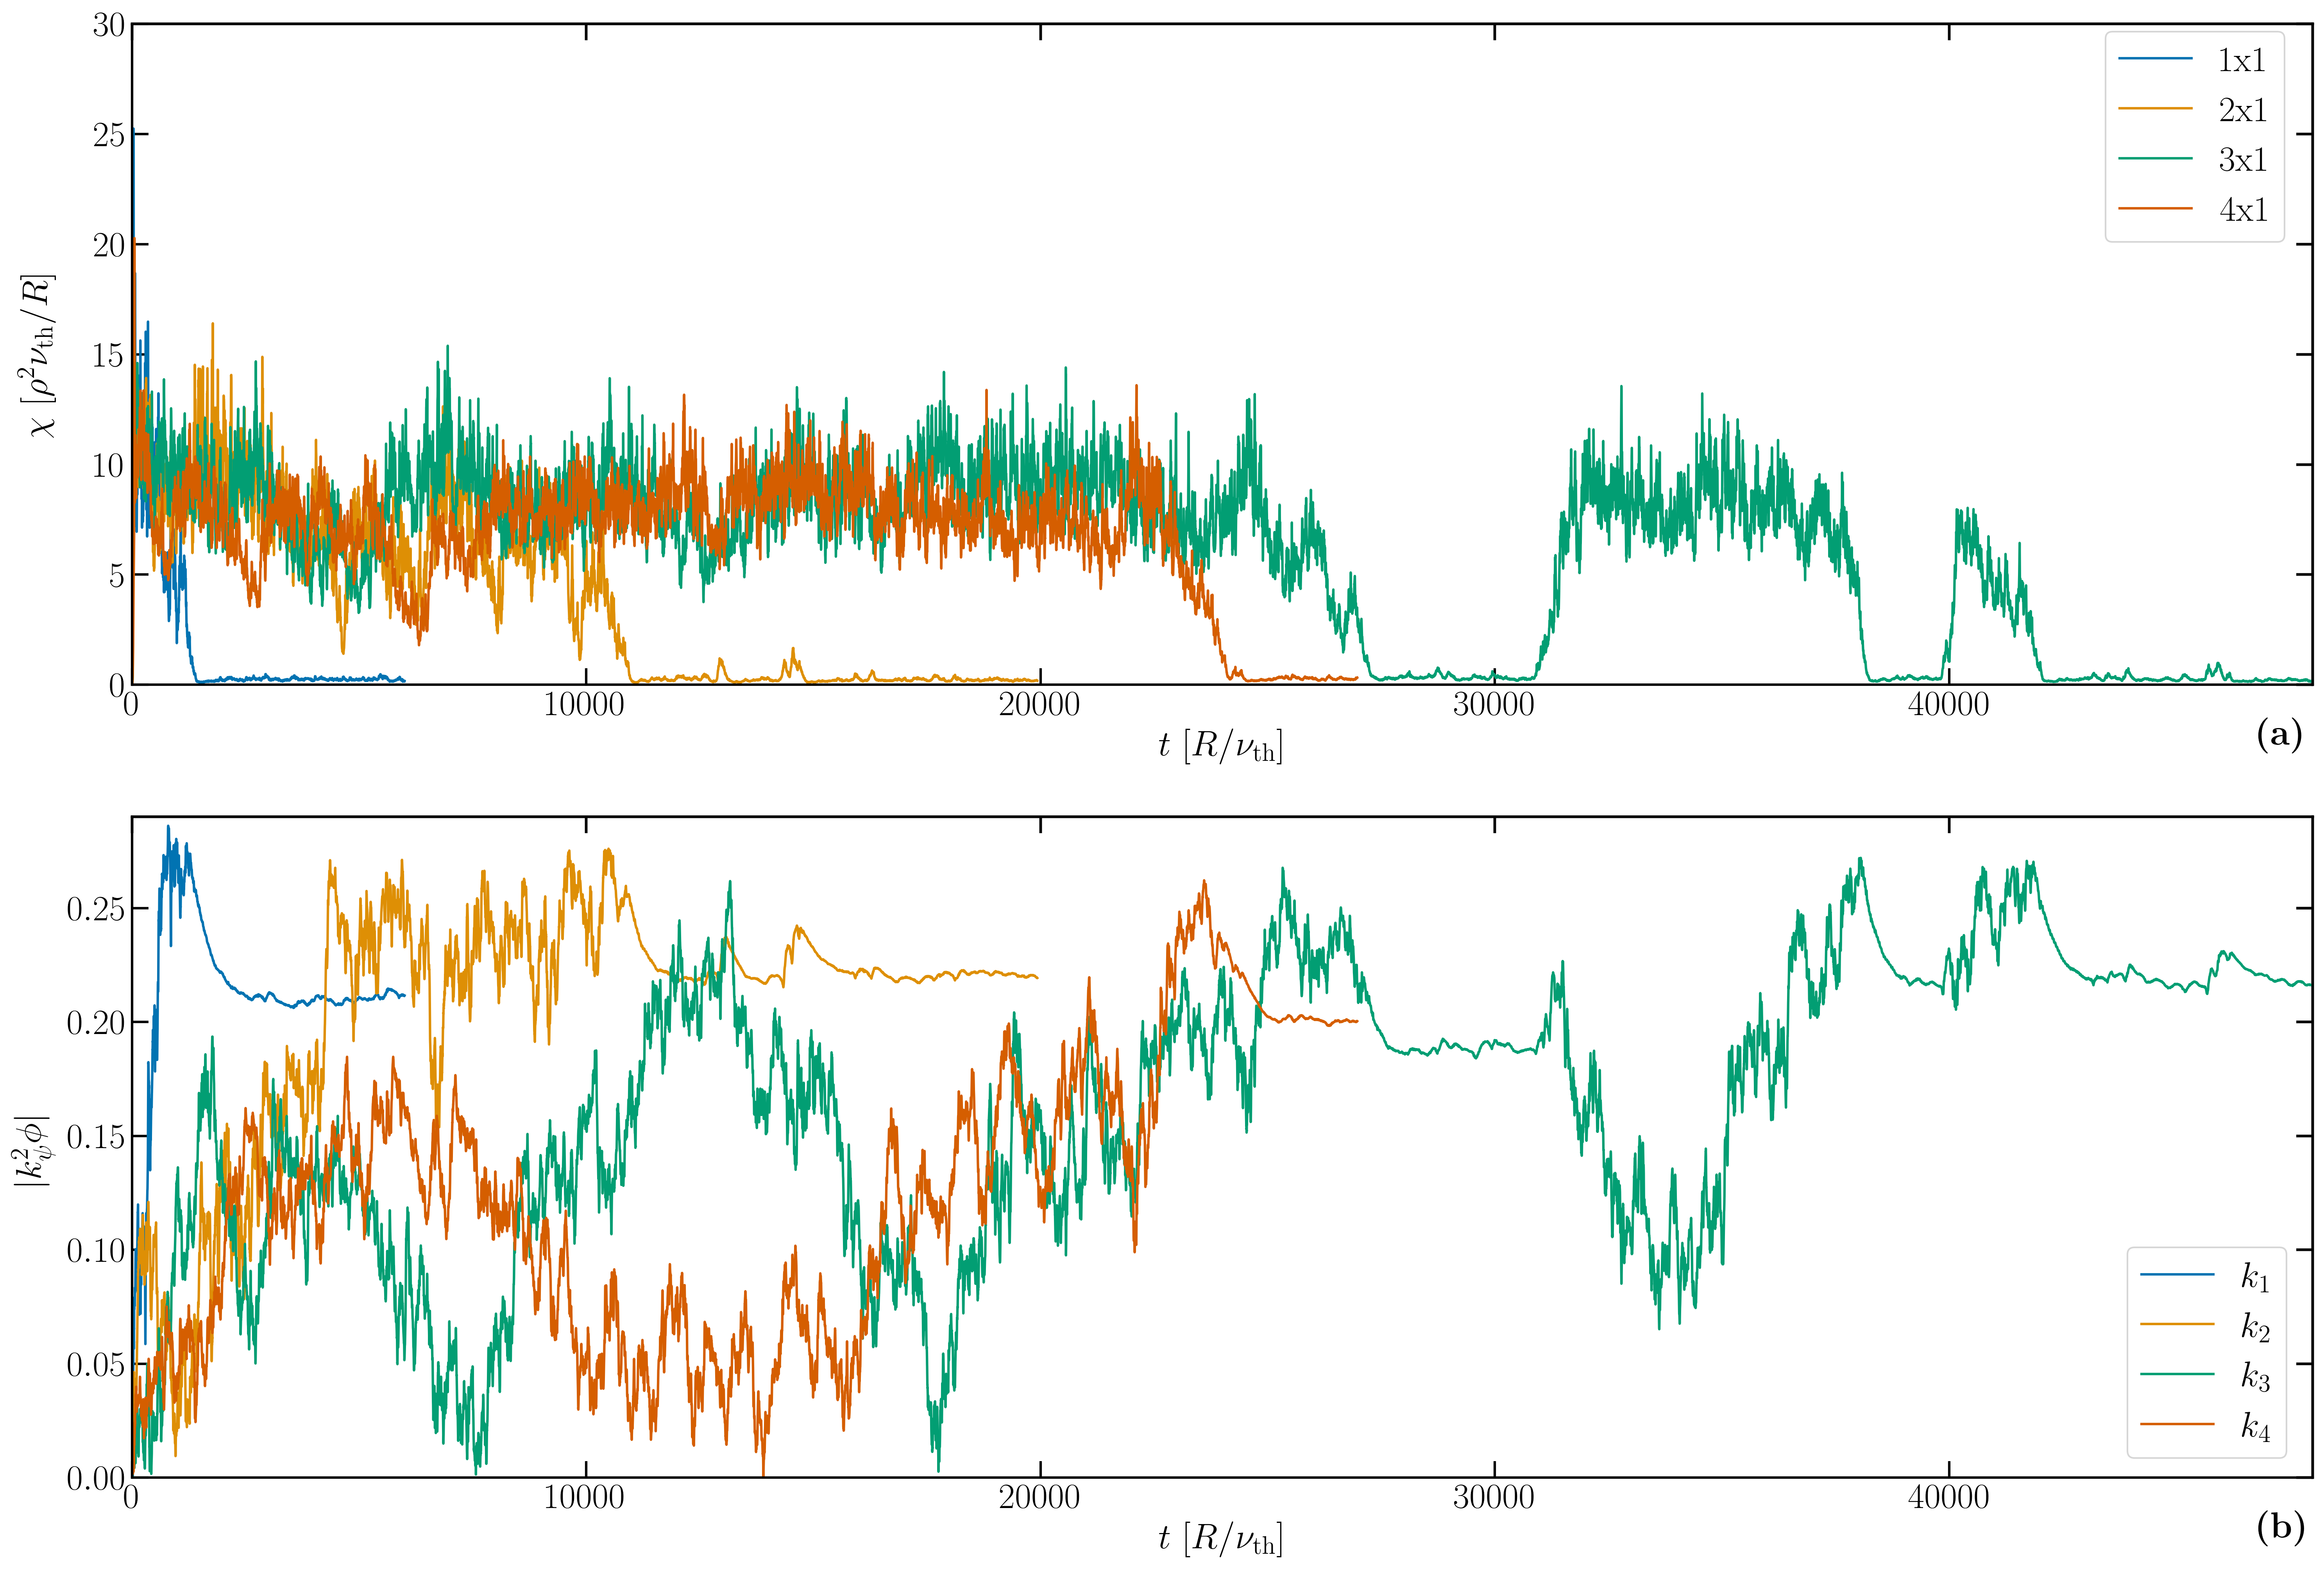

In [31]:
# Compare eflux and amplitude in time domain
fig, (ax_eflux, ax_wexb_max) = plt.subplots(2, 1, figsize = (24,16)) #, sharex=True)

boxsize = [r'1x1', r'2x1', r'3x1', r'4x1']

#ax_eflux.set_title(r'$N_s$ = 16,   $N_{\mathrm{vpar}}$ = 48,   $N_{\mathrm{\mu}}$ = 9', pad=20)
ax_eflux.set_xlabel(r'$t~[R/ \nu_{\mathrm{th}}]$')
ax_eflux.set_ylabel(r'$\chi~[\rho^2 \nu_{\mathrm{th}} / R]$')
ax_eflux.yaxis.set_label_coords(-0.035,0.5)

ax_wexb_max.set_xlabel(r'$t~[R/ \nu_{\mathrm{th}}]$')
ax_wexb_max.set_ylabel(r'$|k_\psi^2 \phi|$')
ax_wexb_max.yaxis.set_label_coords(-0.035,0.5)


fourier_index = 1
x_max = 0
max_index = [None, None, None, 45000]

for i, n, k in zip(f, boxsize, max_index):
    #eflux
    eflux, time = zonalflow.get_eflux_time(i)
    
    eflux, time = eflux[:k], time[:k]

    ax_eflux.plot(time, eflux, label=n)
    
    plot.ax_ticks_subplot(ax_eflux)
    
    if x_max < time[-2]:
        x_max = time[-2]
    
    ax_eflux.set_xlim(xmin=0, xmax=x_max)
    ax_eflux.set_ylim(ymin=0, ymax=30)
    
    ax_eflux.legend(loc=(0.905, 0.67))
    
    #wexb_max
    wexb, rad_coord, rad_boxsize, ddphi, dx, zonal_pot = zonalflow.get_shearingrate_radialcoordinate_radialboxsize_ddphi_dx_zonalpot(i)
    wexb_max = zonalflow.get_max_shearingrate(i, wexb, time, 1)
    
    ax_wexb_max.plot(time, wexb_max[fourier_index][:k], label= r'$k_' + str(fourier_index) + r'$')
    
    fourier_index += 1
    
    plot.ax_ticks_subplot(ax_wexb_max)
    
    ax_wexb_max.set_xlim(xmin=0, xmax=x_max)
    ax_wexb_max.set_ylim(ymin=0, ymax=0.29)
    
    ax_wexb_max.legend(loc=(0.915, 0.03))

#plt.subplots_adjust(wspace=0, hspace=0)
plt.subplots_adjust(top=0.9, wspace=0.4, hspace=0.2)

plot.savefig_subplot(fig, ax_eflux   , picDir + '/S6_rlt6.0_boxsize1-2-3-4x1_Ns16_Nvpar48_Nmu9_eflux_comparison.pdf'   , pad=0.02)
plot.savefig_subplot(fig, ax_wexb_max, picDir + '/S6_rlt6.0_boxsize1-2-3-4x1_Ns16_Nvpar48_Nmu9_wexb_max_comparison.pdf', pad=0.02)

ax_eflux.text(0.975, -0.09, r'\bf{(a)}', transform=ax_eflux.transAxes)
ax_wexb_max.text(0.975, -0.09, r'\bf{(b)}', transform=ax_wexb_max.transAxes)

plt.savefig(picDir + '/S6_rlt6.0_boxsize1-2-3-4x1_Ns16_Nvpar48_Nmu9_comparison.pdf', bbox_inches='tight')

#### Boxsize XxY

In [32]:
# File import and Create picture folder
data = 'S6_rlt6.0'
path = ['boxsize1x1/Ns16/Nvpar48/Nmu9', 'boxsize2x2/Ns16/Nvpar48/Nmu9',
        'boxsize3x3/Ns16/Nvpar48/Nmu9']

filename = [homepath + 'data/'+data+'/'+i+'/data.h5' for i in path]
f = [h5py.File(i,"r+") for i in filename]

picDir = homepath + 'pictures/Comparison/Boxsize/'
# Create target Directory if don't exist
if not os.path.exists(picDir):
    os.makedirs(picDir)

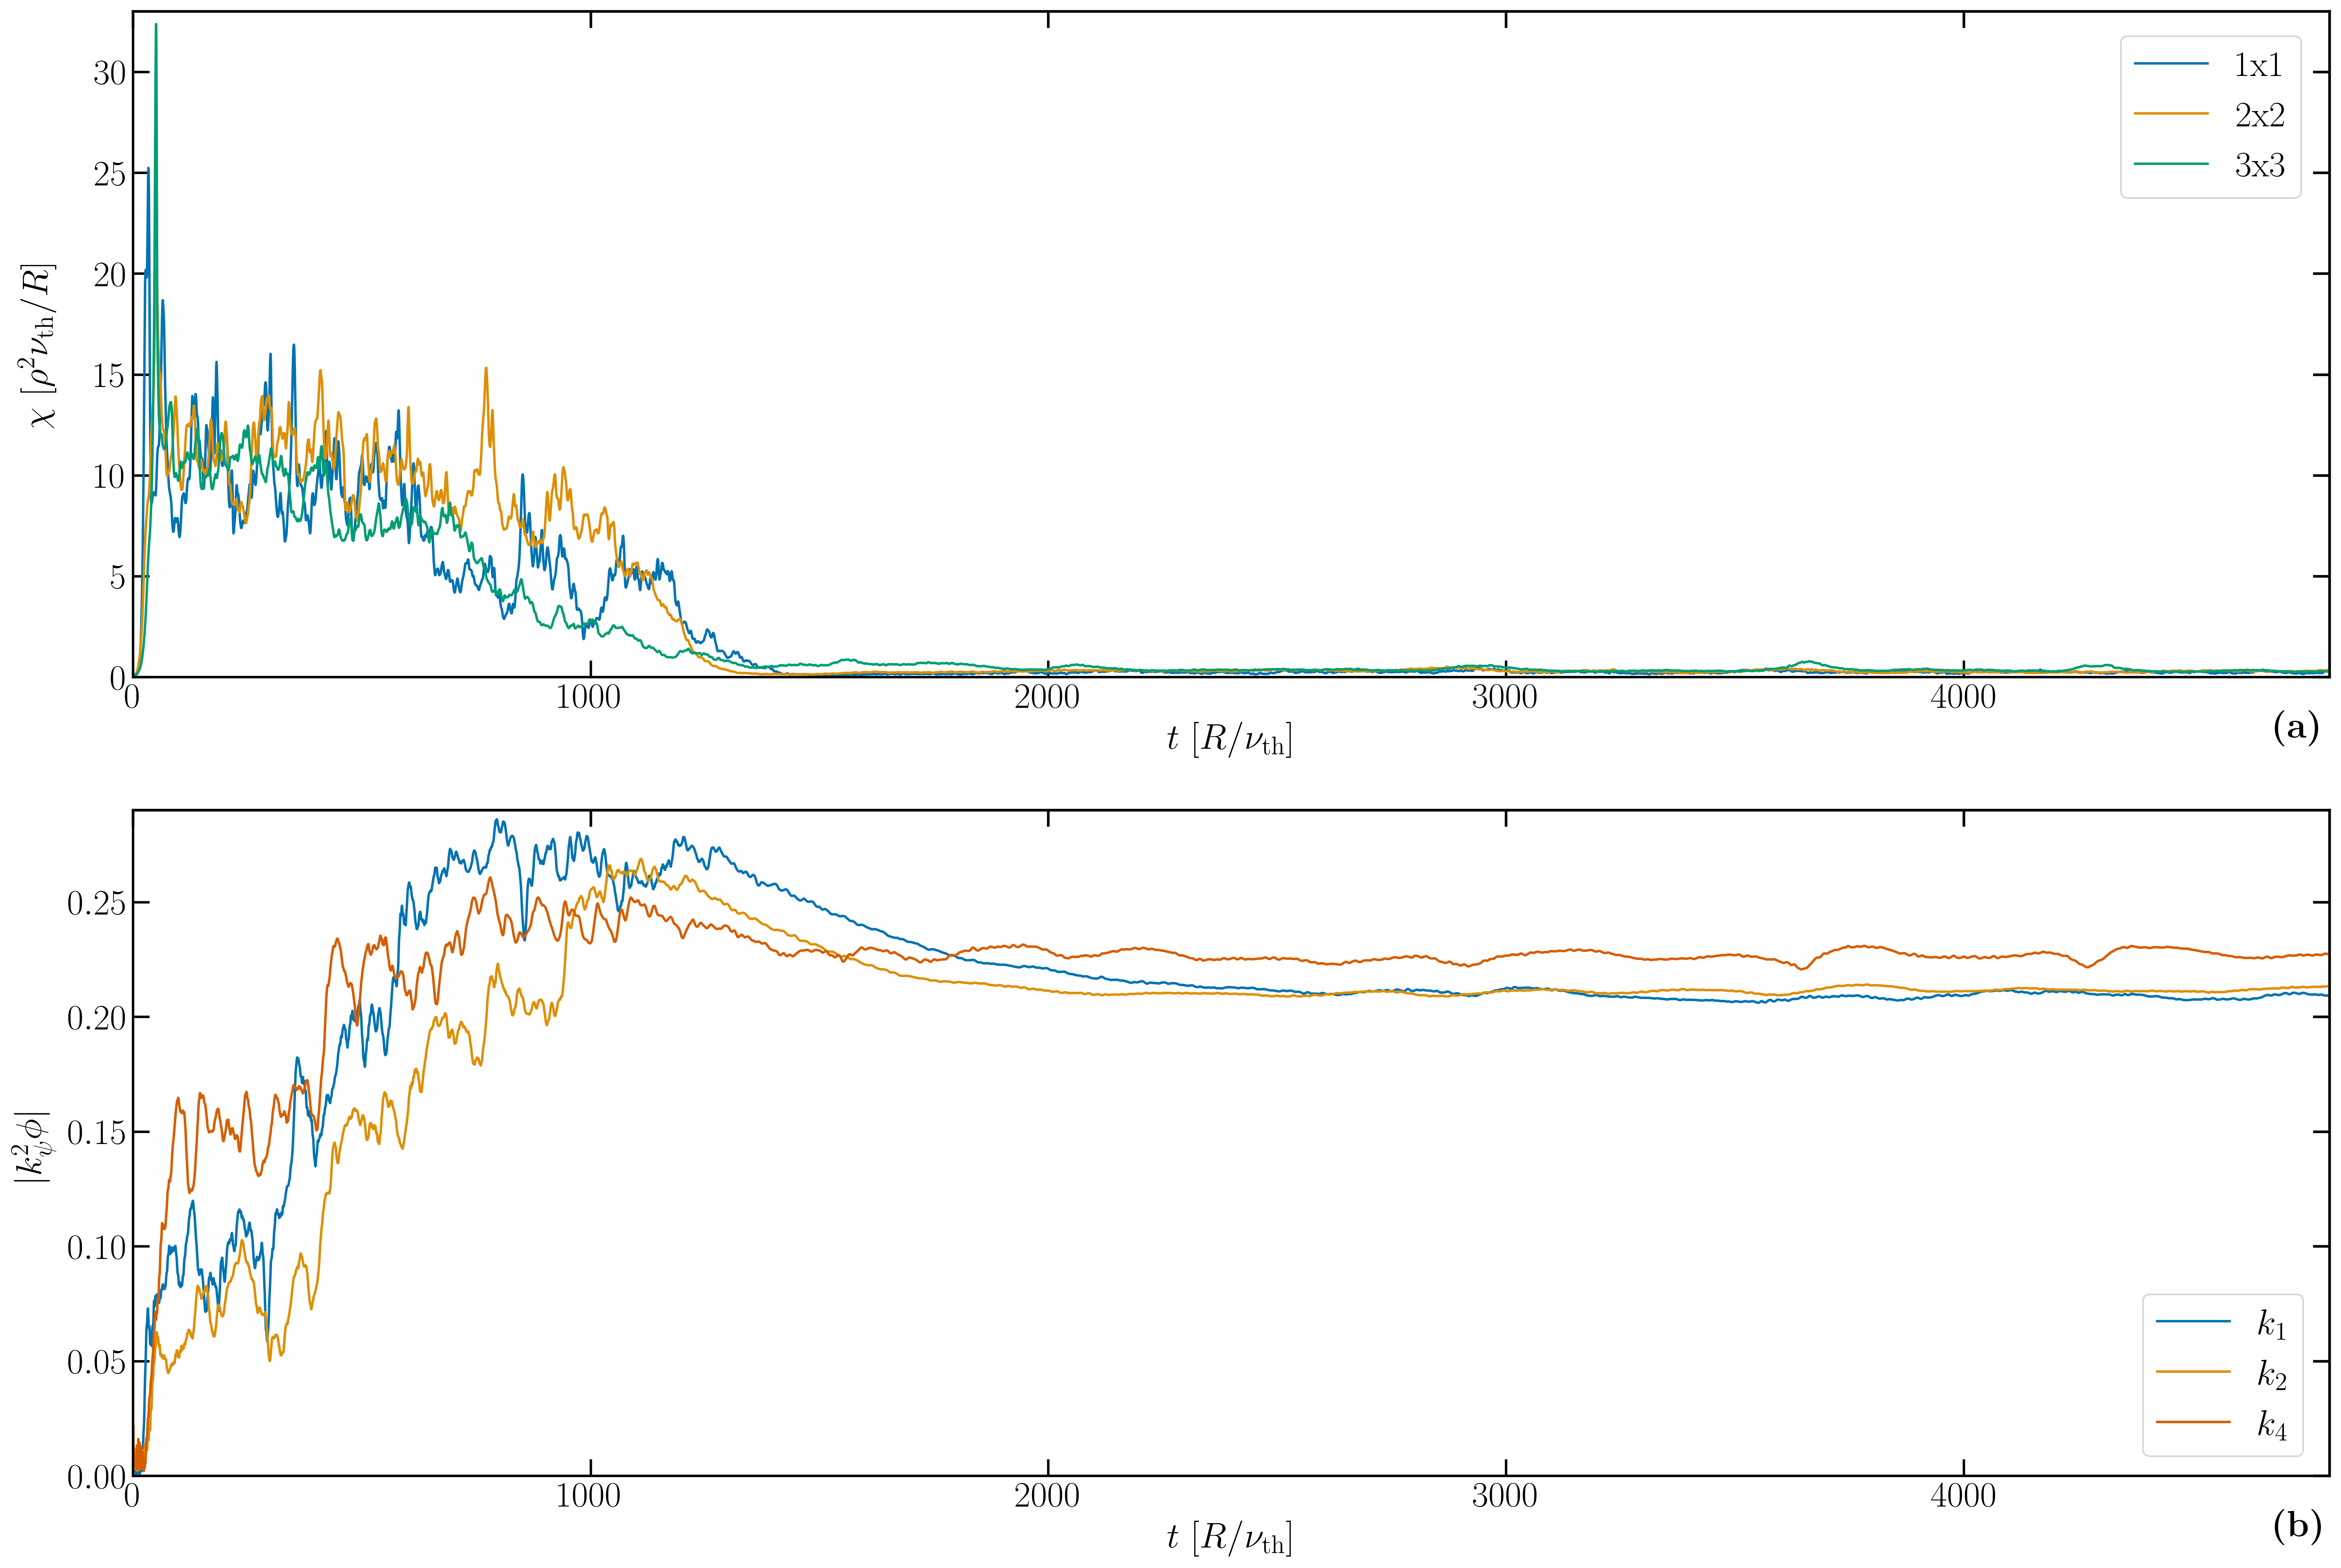

In [35]:
# Compare eflux and amplitude in time domain
fig, (ax_eflux, ax_wexb_max) = plt.subplots(2, 1, figsize = (24,16)) #, sharex=True)

boxsize = [r'1x1', r'2x2', r'3x3']

#ax_eflux.set_title(r'$N_s$ = 16,   $N_{\mathrm{vpar}}$ = 48,   $N_{\mathrm{\mu}}$ = 9', pad=20)
ax_eflux.set_xlabel(r'$t~[R/ \nu_{\mathrm{th}}]$')
ax_eflux.set_ylabel(r'$\chi~[\rho^2 \nu_{\mathrm{th}} / R]$')
ax_eflux.yaxis.set_label_coords(-0.035,0.5)

ax_wexb_max.set_xlabel(r'$t~[R/ \nu_{\mathrm{th}}]$')
ax_wexb_max.set_ylabel(r'$|k_\psi^2 \phi|$')
ax_wexb_max.yaxis.set_label_coords(-0.035,0.5)


x_max = 0
max_index = 8000
fourier_index = [1, 2, 4]
colors = ['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']

for i, n, k in zip(f, boxsize, fourier_index):
    #eflux
    eflux, time = zonalflow.get_eflux_time(i)
    
    eflux, time = eflux[:max_index], time[:max_index]

    ax_eflux.plot(time, eflux, label=n)
    
    plot.ax_ticks_subplot(ax_eflux)
    
    if x_max < time[-2]:
        x_max = time[-2]
    
    ax_eflux.set_xlim(xmin=0, xmax=x_max)
    ax_eflux.set_ylim(ymin=0, ymax=33)
    
    ax_eflux.legend(loc=(0.905, 0.72))
    
    #wexb_max
    wexb, rad_coord, rad_boxsize, ddphi, dx, zonal_pot = zonalflow.get_shearingrate_radialcoordinate_radialboxsize_ddphi_dx_zonalpot(i)
    wexb_max = zonalflow.get_max_shearingrate(i, wexb, time, 1)
    
    ax_wexb_max.plot(time, wexb_max[k][:max_index], label= r'$k_' + str(k) + r'$', color=colors[k-1])
    
    plot.ax_ticks_subplot(ax_wexb_max)
    
    ax_wexb_max.set_xlim(xmin=0, xmax=x_max)
    ax_wexb_max.set_ylim(ymin=0, ymax=0.29)
    
    ax_wexb_max.legend(loc=(0.915, 0.03))

#plt.subplots_adjust(wspace=0, hspace=0)
plt.subplots_adjust(top=0.9, wspace=0.4, hspace=0.2)

plot.savefig_subplot(fig, ax_eflux   , picDir + '/S6_rlt6.0_boxsize1x1-2x2-3x3_Ns16_Nvpar48_Nmu9_eflux_comparison.pdf'   , pad=0.02)
plot.savefig_subplot(fig, ax_wexb_max, picDir + '/S6_rlt6.0_boxsize1x1-2x2-3x3_Ns16_Nvpar48_Nmu9_wexb_max_comparison.pdf', pad=0.02)

ax_eflux.text(0.975, -0.09, r'\bf{(a)}', transform=ax_eflux.transAxes)
ax_wexb_max.text(0.975, -0.09, r'\bf{(b)}', transform=ax_wexb_max.transAxes)

plt.savefig(picDir + '/S6_rlt6.0_boxsize1x1-2x2-3x3_Ns16_Nvpar48_Nmu9_comparison.pdf', bbox_inches='tight')

#### Boxsize 2xY, 3xY

In [3]:
# File import and Create picture folder
data = 'S6_rlt6.0'
path = ['boxsize2x1/Ns16/Nvpar48/Nmu9', 'boxsize2x2/Ns16/Nvpar48/Nmu9',
        'boxsize3x1/Ns16/Nvpar48/Nmu9', 'boxsize3x3/Ns16/Nvpar48/Nmu9']

filename = [homepath + 'data/'+data+'/'+i+'/data.h5' for i in path]
f = [h5py.File(i,"r+") for i in filename]

picDir = homepath + 'pictures/Comparison/Boxsize/'
# Create target Directory if don't exist
if not os.path.exists(picDir):
    os.makedirs(picDir)

In [ ]:
# Compare eflux and amplitude in time domain
fig, (ax_eflux, ax_wexb_max) = plt.subplots(2, 1, figsize = (24,16), sharex=True)

boxsize = [r'2x1', r'2x2', r'3x1', r'3x3']

#ax_eflux.set_title(r'$N_s$ = 16,   $N_{\mathrm{vpar}}$ = 48,   $N_{\mathrm{\mu}}$ = 9', pad=20)
#ax_eflux.set_xlabel(r'$t~[R/ \nu_{\mathrm{th}}]$')
ax_eflux.set_ylabel(r'$\chi~[\rho^2 \nu_{\mathrm{th}} / R]$')
ax_eflux.yaxis.set_label_coords(-0.035,0.5)

ax_wexb_max.set_xlabel(r'$t~[R/ \nu_{\mathrm{th}}]$')
ax_wexb_max.set_ylabel(r'$|k_\psi^2 \phi|$')
ax_wexb_max.yaxis.set_label_coords(-0.035,0.5)


x_max = 0
max_index = 8000
fourier_index = [1, 2, 4]
colors = ['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']

for i, n, k in zip(f, boxsize, fourier_index):
    #eflux
    eflux, time = zonalflow.get_eflux_time(i)
    
    eflux, time = eflux[:max_index], time[:max_index]

    ax_eflux.plot(time, eflux, label=n)
    
    plot.ax_ticks_subplot(ax_eflux)
    
    if x_max < time[-2]:
        x_max = time[-2]
    
    ax_eflux.set_xlim(xmin=0, xmax=x_max)
    ax_eflux.set_ylim(ymin=0, ymax=33)
    
    ax_eflux.legend(loc=(0.905, 0.67))
    
    #wexb_max
    wexb, rad_coord, rad_boxsize, ddphi, dx, zonal_pot = zonalflow.get_shearingrate_radialcoordinate_radialboxsize_ddphi_dx_zonalpot(i)
    wexb_max = zonalflow.get_max_shearingrate(i, wexb, time, 1)
    
    ax_wexb_max.plot(time, wexb_max[k][:max_index], label= r'$k_' + str(k) + r'$', color=colors[k-1])
    
    plot.ax_ticks_subplot(ax_wexb_max)
    
    ax_wexb_max.set_xlim(xmin=0, xmax=x_max)
    ax_wexb_max.set_ylim(ymin=0, ymax=0.29)
    
    ax_wexb_max.legend(loc=(0.915, 0.03))

plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig(picDir + '/S6_rlt6.0_boxsize1x1-2x2-3x3_Ns16_Nvpar48_Nmu9_comparison.pdf', bbox_inches='tight')

#plot.savefig_subplot(fig, ax_eflux   , picDir + '/S6_rlt6.0_boxsize1-2-3-4x1_Ns16_Nvpar48_Nmu9_eflux_comparison.pdf'   , pad=0.02)
#plot.savefig_subplot(fig, ax_wexb_max, picDir + '/S6_rlt6.0_boxsize1-2-3-4x1_Ns16_Nvpar48_Nmu9_wexb_max_comparison.pdf', pad=0.02)